In [1]:
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import re,string,unicodedata

import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
from nltk.tokenize.toktok import ToktokTokenizer

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk

In [3]:
import os

## Read Dataset

In [4]:
df = pd.read_excel("YBM Training Dataset September 23.xlsx")

In [5]:
df.head()

,FeedbackText,Class
0,Nice apartment and easy chek-in and check-out,non-abusive
1,"Seamless was, well, seamless! I checked in lat...",non-abusive
2,Terrific place. Great location and quiet. Real...,non-abusive
3,"Pros - Beautiful location, right next to Publi...",non-abusive
4,"We liked the apartment very much: warm, clean,...",non-abusive


## Data Understanding

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4966 entries, 0 to 4965
Data columns (total 2 columns):
FeedbackText    4966 non-null object
Class           4966 non-null object
dtypes: object(2)
memory usage: 77.7+ KB


In [7]:
df.dtypes


FeedbackText    object
Class           object
dtype: object

In [8]:
df.shape

(4966, 2)

In [9]:
df.isnull().sum()  ## Check for null values

FeedbackText    0
Class           0
dtype: int64

In [10]:
df = df.sample(frac=1).reset_index(drop=True)  ## Shuffle rows of data

In [11]:
df.head(10)

,FeedbackText,Class
0,So I was in Boston still with the continuing s...,non-abusive
1,stupid asshole fucken nigga video so so so so ...,abusive
2,Hermina was a great host :) We were here for t...,non-abusive
3,I never actually met Hermina but I think I was...,non-abusive
4,"""you mutha fucka"" i have no idea why i find th...",abusive
5,You can't ask for a better price for this area...,non-abusive
6,"Excellent,interesting apartment with easy acce...",non-abusive
7,Good location and Sean was very helpful with i...,non-abusive
8,cunt,abusive
9,Last minute request for a room in Boston durin...,non-abusive


In [12]:
df.FeedbackText[0]

'So I was in Boston still with the continuing saga of trying to find a place to stay during the Stanley Cup Finals (that not being my reason for being there), and really running out of options. First place I stayed at was lovely, but as it was a bit too close to the stadium my stay was cut short. Cue Atef, whose place was cozy and incredibly well-placed in a quiet area in Boston unfamilar to me (making me finally use the reasonable and pretty reliable T), and who got back to me lightning fast and saved my bacon. Place to stay, check. Quiet, charming, check check. Good local pub, check. No TV, PERFECT. On my list for my next trip to Boston, and highly recommended for anyone looking for a great launching pad to explore the city.'

In [13]:
## Remove noise from data

def remove_noise(df):
    remove_extra = []
    for message in df['FeedbackText']:
        message = str(message)
        message = message.replace('  ','')
        message = re.sub(r'[^\w]', ' ', message)
        message = re.sub(" \d+", " ", message)
        message = re.sub('\[[^]]*\]', '', message)
        message = re.sub(r'[^a-zA-z0-9\s]','',message)
        message = message.lower()
        remove_extra.append(message)
      
    df['FeedbackText'] = remove_extra
    return df

In [14]:
df = remove_noise(df)

In [15]:
df.head(10)

,FeedbackText,Class
0,so i was in boston still with the continuing s...,non-abusive
1,stupid asshole fucken nigga video so so so so ...,abusive
2,hermina was a great host we were here for t...,non-abusive
3,i never actually met hermina but i think i was...,non-abusive
4,you mutha fucka i have no idea why i find th...,abusive
5,you can t ask for a better price for this area...,non-abusive
6,excellent interesting apartment with easy acce...,non-abusive
7,good location and sean was very helpful with i...,non-abusive
8,cunt,abusive
9,last minute request for a room in boston durin...,non-abusive


In [16]:
from nltk.corpus import stopwords


In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
tokenizer=ToktokTokenizer()
stopwordsList=stopwords.words('english')

In [20]:
stopwordsList

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [21]:
text = ' i love mango'
tokens = tokenizer.tokenize(text)
tokens=[token.strip() for token in tokens]
tokens

['i', 'love', 'mango']

In [22]:
## Stopword removal

stop=set(stopwords.words('english'))

def stopword_removal(text, is_lower_case=False):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    filtered_tokens = [token for token in tokens if token not in stopwordsList]
    filtered_text = ' '.join(filtered_tokens)    
    return filtered_text

In [23]:
df['FeedbackText']=df['FeedbackText'].apply(stopword_removal)

In [24]:
df.head(10)

,FeedbackText,Class
0,boston still continuing saga trying find place...,non-abusive
1,stupid asshole fucken nigga video dumb bitch,abusive
2,hermina great host pax east convention ride mi...,non-abusive
3,never actually met hermina think coming going ...,non-abusive
4,mutha fucka idea find funny maybe way says,abusive
5,ask better price area boston hotels nearby cli...,non-abusive
6,excellent interesting apartment easy access bo...,non-abusive
7,good location sean helpful information surroun...,non-abusive
8,cunt,abusive
9,last minute request room boston parents weeken...,non-abusive


In [25]:
x=df

In [26]:
x['class_id'] = x['Class'].factorize()[0]

In [27]:

class_id_x=x[['Class', 'class_id']].drop_duplicates().sort_values('class_id')

In [28]:
class_id_x

,Class,class_id
0,non-abusive,0
1,abusive,1


In [29]:
class_id_x.values

array([['non-abusive', 0],
       ['abusive', 1]], dtype=object)

In [30]:
 dict(class_id_x.values)

{'non-abusive': 0, 'abusive': 1}

In [31]:
class_id_x[['class_id', 'Class']].values

array([[0, 'non-abusive'],
       [1, 'abusive']], dtype=object)

In [32]:
id_to_class = dict(class_id_x[['class_id', 'Class']].values)
id_to_class

{0: 'non-abusive', 1: 'abusive'}

In [33]:
## Encode alphanumeric classes into machine understandable format

df['class_id'] = df['Class'].factorize()[0]
class_id_df = df[['Class', 'class_id']].drop_duplicates().sort_values('class_id')
class_to_id = dict(class_id_df.values)
id_to_class = dict(class_id_df[['class_id', 'Class']].values)
df.head(10)

,FeedbackText,Class,class_id
0,boston still continuing saga trying find place...,non-abusive,0
1,stupid asshole fucken nigga video dumb bitch,abusive,1
2,hermina great host pax east convention ride mi...,non-abusive,0
3,never actually met hermina think coming going ...,non-abusive,0
4,mutha fucka idea find funny maybe way says,abusive,1
5,ask better price area boston hotels nearby cli...,non-abusive,0
6,excellent interesting apartment easy access bo...,non-abusive,0
7,good location sean helpful information surroun...,non-abusive,0
8,cunt,abusive,1
9,last minute request room boston parents weeken...,non-abusive,0


In [34]:
id_to_class

{0: 'non-abusive', 1: 'abusive'}

In [35]:
## Text vectorization 

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')

In [36]:
var_tfidf = tfidf.fit(df.FeedbackText)
features = var_tfidf.transform(df.FeedbackText)
labels = df.class_id
labels

0       0
1       1
2       0
3       0
4       1
       ..
4961    0
4962    0
4963    0
4964    0
4965    0
Name: class_id, Length: 4966, dtype: int64

In [37]:
feature=pd.DataFrame(features.todense(),columns=var_tfidf.get_feature_names())
feature

,10,10 fuck,10 iphone,100,100 rape,100 recommended,100 says,1848,20,20 angela,...,zur seite,zustand,zustand hermina,zwei,zwei freunde,zwei raum,zweiter,zweiter mieter,zwischen,zwischen und
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4962,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4963,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4964,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [38]:
## Text vectorization 

tfidf = TfidfVectorizer(sublinear_tf=True, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
# tfidf = TfidfVectorizer(norm='l2', min_df=5, encoding='latin-1', ngram_range=(1, 2), stop_words='english')
var_tfidf = tfidf.fit(df.FeedbackText)
features = var_tfidf.transform(df.FeedbackText)
labels = df.class_id

## Model Training

In [39]:
model = LinearSVC()
X_train, X_test, y_train, y_test, indices_train, indices_test = train_test_split(features, labels, df.index, test_size=0.30, random_state=0)
# X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.30, random_state=0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

## Performance Evaluation

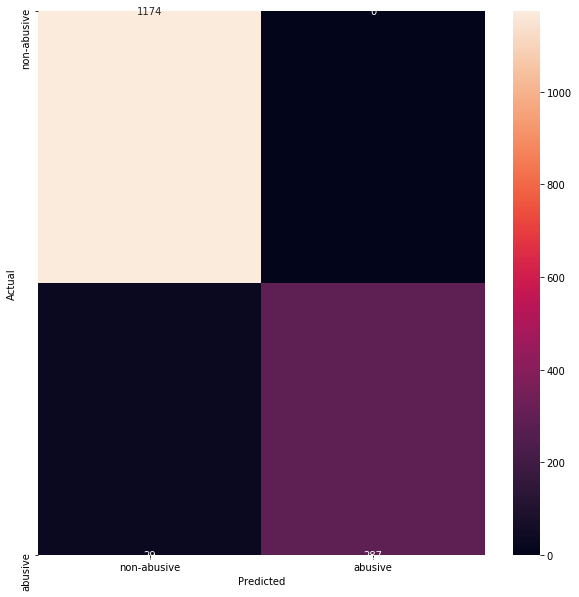

In [40]:
conf_mat = confusion_matrix(y_test, y_pred)
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(conf_mat, annot=True, fmt='d',
           xticklabels=class_id_df.Class.values, yticklabels=class_id_df.Class.values)
plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [41]:
print(metrics.classification_report(y_test, y_pred, target_names=df['Class'].unique()))

              precision    recall  f1-score   support

 non-abusive       0.98      1.00      0.99      1174
     abusive       1.00      0.91      0.95       316

    accuracy                           0.98      1490
   macro avg       0.99      0.95      0.97      1490
weighted avg       0.98      0.98      0.98      1490



In [36]:
!pip install yellowbrick

In [39]:
!pip install sklearn

  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1321 sha256=31ee09cd4fa84ed18fc771bf00bd98bc55f0ab8b253d82db970310ece152350c
  Stored in directory: C:\Users\user\AppData\Local\pip\Cache\wheels\76\03\bb\589d421d27431bcd2c6da284d5f2286c8e3b2ea3cf1594c074
Successfully built sklearn


In [40]:
!pip install scikit_learn

In [43]:
!pip install "scikit_learn==0.22.2.post1"

  Found existing installation: scikit-learn 0.21.3
    Uninstalling scikit-learn-0.21.3:


ERROR: Could not install packages due to an EnvironmentError: [WinError 5] Access is denied: 'c:\\programdata\\anaconda3\\lib\\site-packages\\scikit_learn-0.21.3.dist-info\\COPYING'
Consider using the `--user` option or check the permissions.



In [42]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.regressor import PredictionError
from yellowbrick.classifier import  ClassificationReport

ModuleNotFoundError: No module named 'sklearn.metrics._classification'

In [38]:
classes = ['non-abusive','abusive']
visualizer = ClassificationReport(model, classes=classes, support=True)

visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

NameError: name 'ClassificationReport' is not defined

## Pickling

In [43]:
import joblib

In [44]:
from joblib import load, dump

In [46]:
dump(var_tfidf, "joblib/TfidfVectorizer.joblib")
dump(model, "joblib/LinearSVC.joblib")

['joblib/LinearSVC.joblib']

In [51]:
filename = 'joblib/LinearSVC.joblib'

In [52]:
loaded_model = joblib.load(filename)
loaded_model


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [53]:
vectorizer = joblib.load('joblib/TfidfVectorizer.joblib')
selector = joblib.load('joblib/LinearSVC.joblib')



In [63]:
vectors = vectorizer.transform(['you are dumbass'])
vectors

<1x83380 sparse matrix of type '<class 'numpy.float64'>'
	with 1 stored elements in Compressed Sparse Row format>

In [55]:
vec_sel = selector.predict(vectors)
vec_sel

array([1], dtype=int64)

In [56]:
import pickle

In [60]:
filename = 'joblib/TfidfVectorizer.joblib'

 


In [59]:
# some time later...
 
# load the model from disk
loaded_model = pickle.load(open(filename, 'rb'))
loaded_model


UnpicklingError: invalid load key, '\x00'.

In [58]:
result = loaded_model.score(X_test, Y_test)

NameError: name 'Y_test' is not defined

## K-Fold Cross Validation

In [61]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

In [62]:
scores = cross_val_score(model, X_test, y_test, cv=10)
scores

array([0.95333333, 0.96      , 0.96666667, 0.94666667, 0.97315436,
       0.95302013, 0.96621622, 0.97972973, 0.95945946, 0.97972973])